In [1]:
import cv2
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Machine Learning Basics

## Training and testing datasets

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))



## Overview of common ML algorithms (SVM, k-NN)

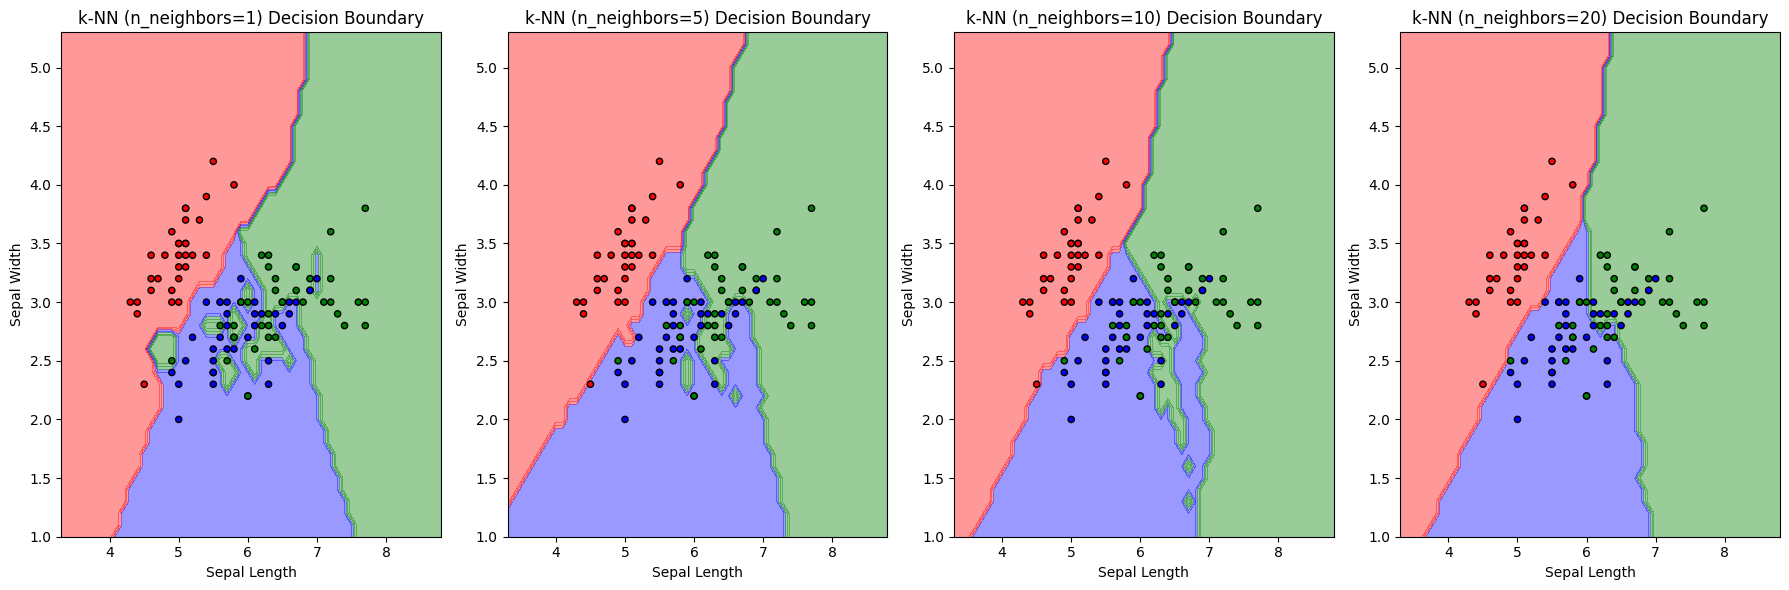

In [14]:
# k-NN with different n_neighbors
n_neighbors_list = [1, 5, 10, 20]

plt.figure(figsize=(18, 6))
for i, n_neighbors in enumerate(n_neighbors_list, 1):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_knn = Z_knn.reshape(xx.shape)
    plt.subplot(1, len(n_neighbors_list), i)
    plt.contourf(xx, yy, Z_knn, alpha=0.4, cmap=ListedColormap(('red', 'blue', 'green')))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap=ListedColormap(('red', 'blue', 'green')))
    plt.title(f'k-NN (n_neighbors={n_neighbors}) Decision Boundary')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')

plt.tight_layout()
plt.show()


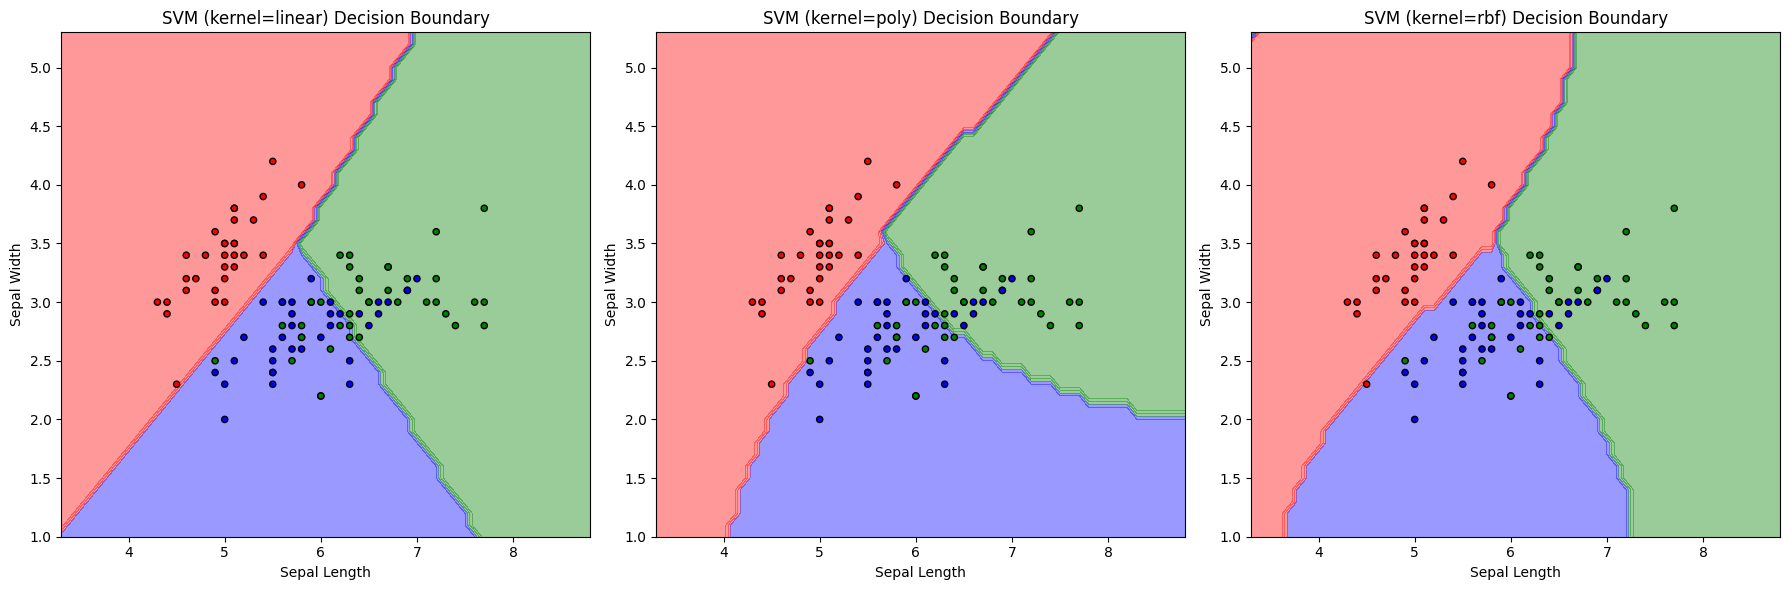

In [15]:
# SVM with different kernels
kernels = ['linear', 'poly', 'rbf']

plt.figure(figsize=(18, 6))
for i, kernel in enumerate(kernels, 1):
    svm = SVC(kernel=kernel, gamma='auto')
    svm.fit(X_train, y_train)
    Z_svm = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_svm = Z_svm.reshape(xx.shape)
    plt.subplot(1, 3, i)
    plt.contourf(xx, yy, Z_svm, alpha=0.4, cmap=ListedColormap(('red', 'blue', 'green')))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20, cmap=ListedColormap(('red', 'blue', 'green')))
    plt.title(f'SVM (kernel={kernel}) Decision Boundary')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')

plt.tight_layout()
plt.show()


# MNIST

11490434/11490434 [==============================] - 0s 0us/step


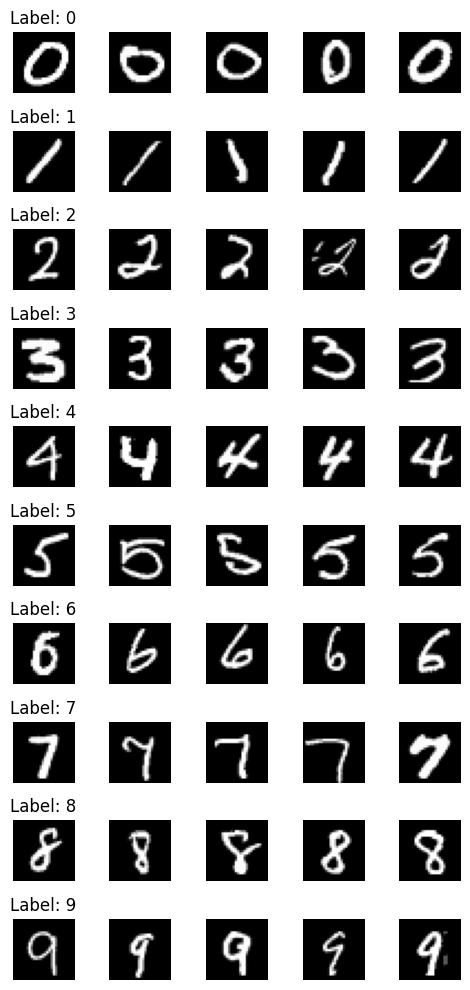

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt


# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


# Display samples of MNIST dataset for each label
num_classes = 10
samples_per_class = 5
fig, axes = plt.subplots(num_classes, samples_per_class, figsize=(samples_per_class, num_classes))

for label in range(num_classes):
    idxs = np.where(train_labels == label)[0]
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        ax = axes[label, i]
        ax.imshow(train_images[idx].reshape(28, 28), cmap='gray')
        ax.axis('off')
        if i == 0:
            ax.set_title(f'Label: {label}')

plt.tight_layout()
plt.show()


## KNN, SVM

In [26]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Create a GridSearchCV object for SVM
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=3)
grid_search_svm.fit(X_train, y_train)

# Print the best parameters and accuracy for SVM
print(f'Best SVM parameters: {grid_search_svm.best_params_}')
print(f'Best SVM accuracy: {grid_search_svm.best_score_}')

# Predict with the best SVM model
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
print(f'SVM Accuracy on test set: {accuracy_score(y_test, y_pred_svm)}')

print(100 * '-')
# Define parameter grid for k-NN
param_grid_knn = {
    'n_neighbors': [1, 2, 3, 5, 7, 9],
}

# Create a GridSearchCV object for k-NN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3)
grid_search_knn.fit(X_train, y_train)

# Print the best parameters and accuracy for k-NN
print(f'Best k-NN parameters: {grid_search_knn.best_params_}')
print(f'Best k-NN accuracy: {grid_search_knn.best_score_}')

# Predict with the best k-NN model
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
print(f'k-NN Accuracy on test set: {accuracy_score(y_test, y_pred_knn)}')


Best SVM parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best SVM accuracy: 0.8285714285714286
SVM Accuracy on test set: 0.8222222222222222
----------------------------------------------------------------------------------------------------
Best k-NN parameters: {'n_neighbors': 9}
Best k-NN accuracy: 0.7999999999999999
k-NN Accuracy on test set: 0.8


## Basics of Convolutional Neural Networks (CNNs)

Epoch 1/5
1875/1875 [==============================] - 29s 10ms/step - loss: 0.1418 - accuracy: 0.9559 - val_loss: 0.0435 - val_accuracy: 0.9843
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.0407 - val_accuracy: 0.9862
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0335 - accuracy: 0.9895 - val_loss: 0.0344 - val_accuracy: 0.9884
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0300 - val_accuracy: 0.9905
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0282 - accuracy: 0.9914
Test accuracy: 0.9914000034332275


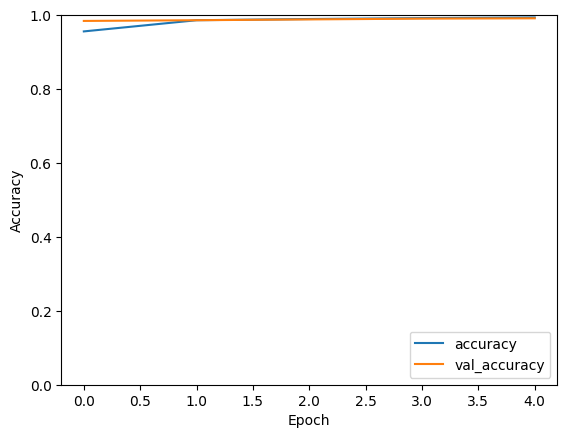

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
